# Instalowanie bibliotek

In [1]:
!pip install pandas shap numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.2 MB/s eta 0:00:00


# Importy

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Wczytanie danych

In [3]:
dane = pd.read_csv("/content/trump.csv")
dane.head()

,GISJOIN,county_code,FIPS,YEAR,STATE,STATEA,COUNTY,COUNTYA,NAME,RUCC_2013,...,transp_public,pov_under_1,insured_under65,house_vacant,housevalue_median,POP16dens,MEDIAN_INCOME08_16,POP08_16,edu_high,housevalue_IQR
0,G0100010,1001,1001,2012-2016,Alabama,1,Autauga County,1,"Autauga County, Alabama",2.0,...,0.000782,0.122660,0.896521,0.084265,141000.0,35.167013,-0.012534,0.008408,0.245928,136300.0
1,G0100030,1003,1003,2012-2016,Alabama,1,Baldwin County,3,"Baldwin County, Alabama",3.0,...,0.002143,0.129938,0.856273,0.301453,173400.0,47.226343,0.012996,0.088874,0.295471,157800.0
2,G0100050,1005,1005,2012-2016,Alabama,1,Barbour County,5,"Barbour County, Alabama",6.0,...,0.003871,0.263737,0.842386,0.227080,90300.0,11.360474,0.064819,-0.031126,0.128678,116300.0
3,G0100070,1007,1007,2012-2016,Alabama,1,Bibb County,7,"Bibb County, Alabama",1.0,...,0.004831,0.164539,0.892983,0.214445,97200.0,13.918126,0.080165,-0.008652,0.120000,112300.0
4,G0100090,1009,1009,2012-2016,Alabama,1,Blount County,9,"Blount County, Alabama",1.0,...,0.001733,0.165344,0.867668,0.135472,124200.0,34.243279,0.022570,0.004142,0.130498,119800.0


In [4]:
dane.columns

Index(['GISJOIN', 'county_code', 'FIPS', 'YEAR', 'STATE', 'STATEA', 'COUNTY',
       'COUNTYA', 'NAME', 'RUCC_2013', 'election_votes_dem',
       'election_votes_gop', 'election_total_votes', 'election_per_dem',
       'election_per_gop', 'race_white', 'race_black', 'race_hispanic',
       'sex_female', 'age_0_17', 'age_over65', 'ind_divorce',
       'marriage_never_married', 'lang_second_eng', 'empl_civilian_unemployed',
       'ind_agriculture', 'income_median', 'public_asist', 'gini_index',
       'transp_car', 'transp_public', 'pov_under_1', 'insured_under65',
       'house_vacant', 'housevalue_median', 'POP16dens', 'MEDIAN_INCOME08_16',
       'POP08_16', 'edu_high', 'housevalue_IQR'],
      dtype='object')

In [5]:
dane.fillna(0, inplace=True)

# Custom Y

In [10]:
# dane['who_won'] = np.where(dane['election_per_dem'] > dane['election_per_gop'], -dane['election_per_dem'], dane['election_per_gop'])
dane['who_won'] = dane['election_per_gop'] - dane['election_per_dem']

In [11]:
X = dane.iloc[:,15:-1]
y = dane.iloc[:, -1]

In [12]:
X.head()

,race_white,race_black,race_hispanic,sex_female,age_0_17,age_over65,ind_divorce,marriage_never_married,lang_second_eng,empl_civilian_unemployed,...,transp_public,pov_under_1,insured_under65,house_vacant,housevalue_median,POP16dens,MEDIAN_INCOME08_16,POP08_16,edu_high,housevalue_IQR
0,0.756835,0.183709,0.025723,0.511762,0.251649,0.139785,0.196471,0.248933,0.041779,0.033644,...,0.000782,0.122660,0.896521,0.084265,141000.0,35.167013,-0.012534,0.008408,0.245928,136300.0
1,0.831788,0.092256,0.043667,0.511949,0.221894,0.187149,0.231375,0.246486,0.069489,0.036725,...,0.002143,0.129938,0.856273,0.301453,173400.0,47.226343,0.012996,0.088874,0.295471,157800.0
2,0.458856,0.478883,0.043098,0.464981,0.215488,0.165289,0.281972,0.345559,0.060732,0.061604,...,0.003871,0.263737,0.842386,0.227080,90300.0,11.360474,0.064819,-0.031126,0.128678,116300.0
3,0.747652,0.212121,0.022240,0.464646,0.210704,0.148857,0.231938,0.296369,0.023695,0.034764,...,0.004831,0.164539,0.892983,0.214445,97200.0,13.918126,0.080165,-0.008652,0.120000,112300.0
4,0.876577,0.015580,0.087273,0.504852,0.235703,0.171929,0.182036,0.198090,0.068917,0.029713,...,0.001733,0.165344,0.867668,0.135472,124200.0,34.243279,0.022570,0.004142,0.130498,119800.0


In [13]:
y.head()

0    0.494789
1    0.577862
2    0.056112
3    0.555441
4    0.813820
Name: who_won, dtype: float64

In [15]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Model - GradientBoostingRegressor

In [16]:
model = GradientBoostingRegressor()
model.fit(x_scaled, y)

GradientBoostingRegressor()

# Explainer, Wartości Shapley'a

In [24]:
explainer = shap.explainers.Permutation(model.predict, x_scaled)
shap_values = explainer(x_scaled, max_evals=51, error_bounds=True)

PermutationExplainer explainer: 3143it [00:37, 60.24it/s]


In [25]:
shap_values

.values =
array([[ 0.03984959,  0.00662455,  0.0041626 , ...,  0.00542422,
         0.00086244,  0.00275807],
       [ 0.05285524,  0.01789232,  0.00029724, ...,  0.00830228,
        -0.03615812,  0.00386976],
       [-0.14594054, -0.11874648,  0.00105896, ..., -0.00619748,
         0.02999668,  0.00231037],
       ...,
       [ 0.05669758,  0.00299577,  0.00328522, ..., -0.0025515 ,
         0.01863521,  0.00252856],
       [ 0.04743516,  0.00836882,  0.00382184, ..., -0.00361967,
         0.01263653,  0.00164479],
       [ 0.05460606,  0.00531262, -0.00247251, ..., -0.00125028,
         0.01870068,  0.00561763]])

.base_values =
array([0.29933004, 0.29933004, 0.29933004, ..., 0.29933004, 0.29933004,
       0.29933004])

.data =
array([[-6.87637654e-02,  6.56576221e-01, -4.68855023e-01, ...,
         7.49155620e-02,  4.15296257e-01,  1.15515493e-01],
       [ 3.05259933e-01,  2.33858882e-02, -3.36877311e-01, ...,
         1.98012545e+00,  9.57250854e-01,  4.31789089e-01],
       [-1.5

# Summary plot

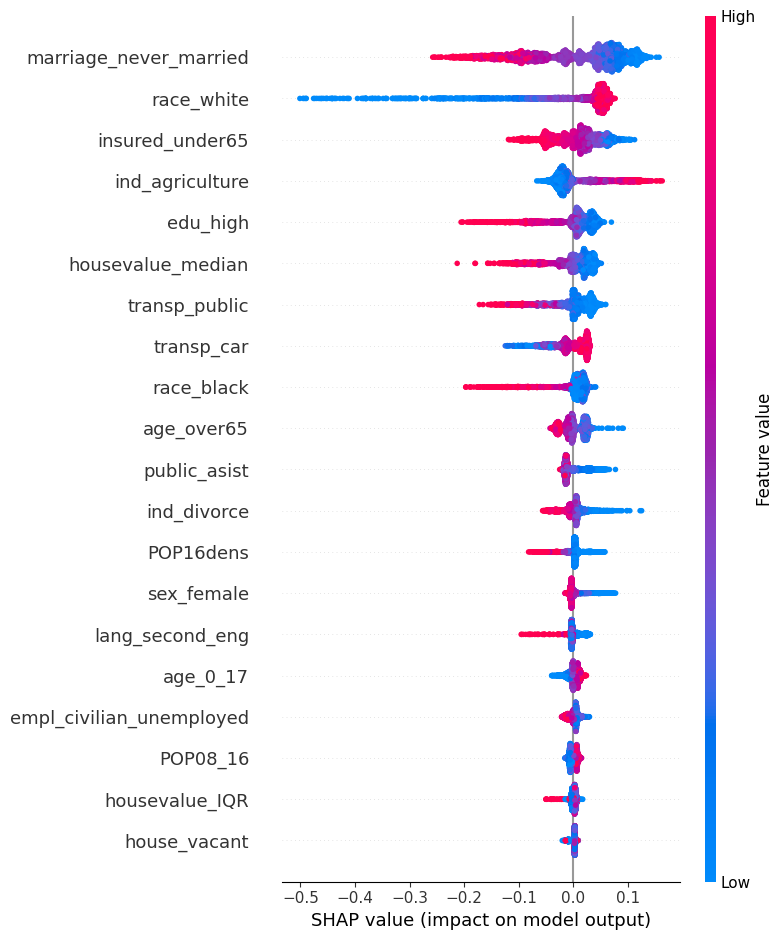

In [26]:
summary_plot = shap.summary_plot(shap_values, X)
summary_plot

# Wykresy zależności

In [28]:
shap_values_2 = explainer.shap_values(x_scaled)

PermutationExplainer explainer: 3143it [01:54, 25.20it/s]                          


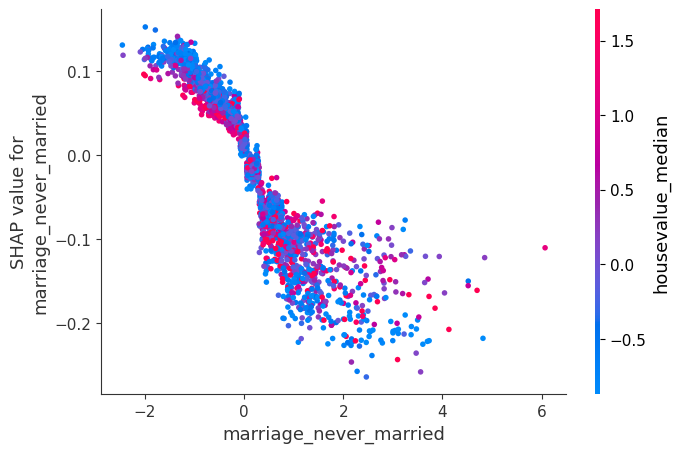

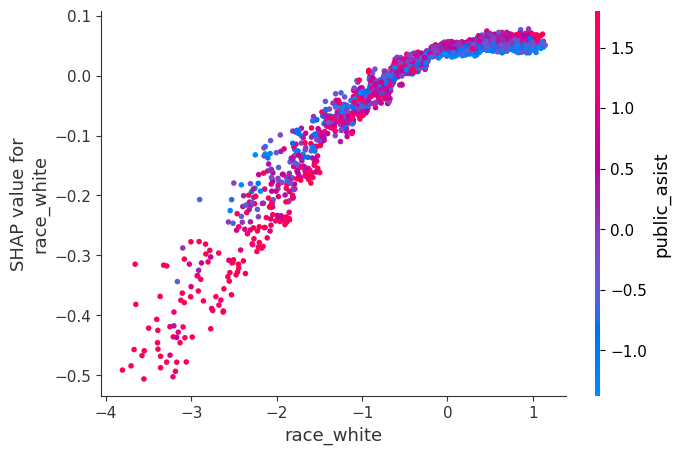

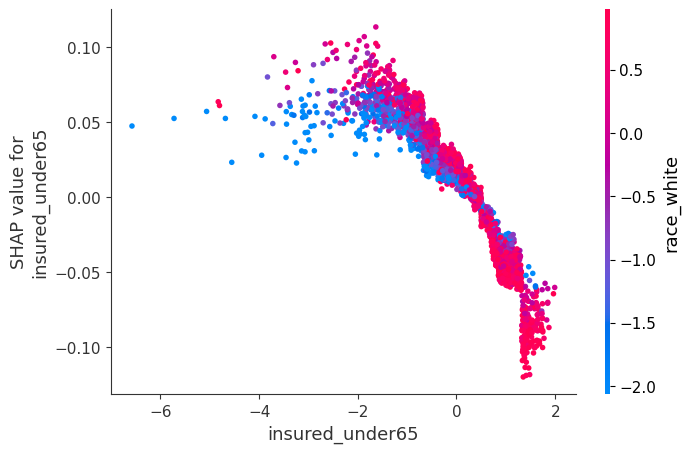

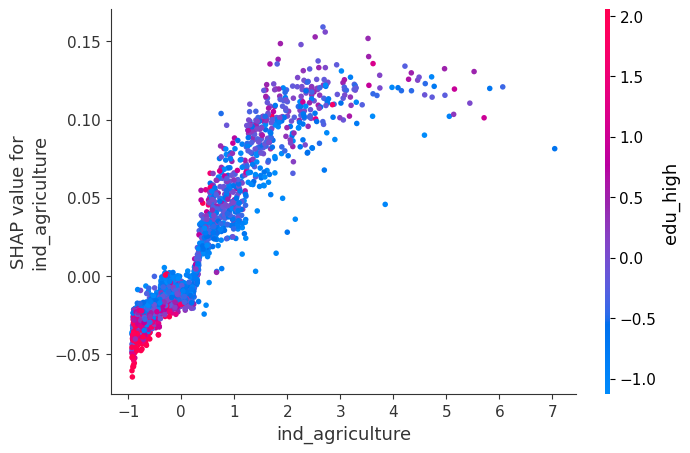

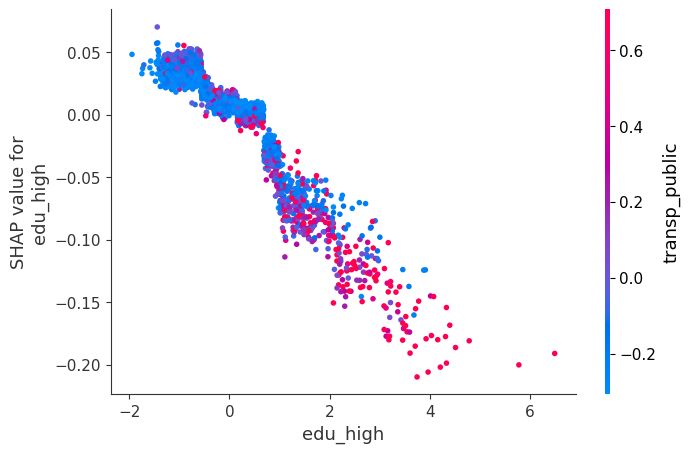

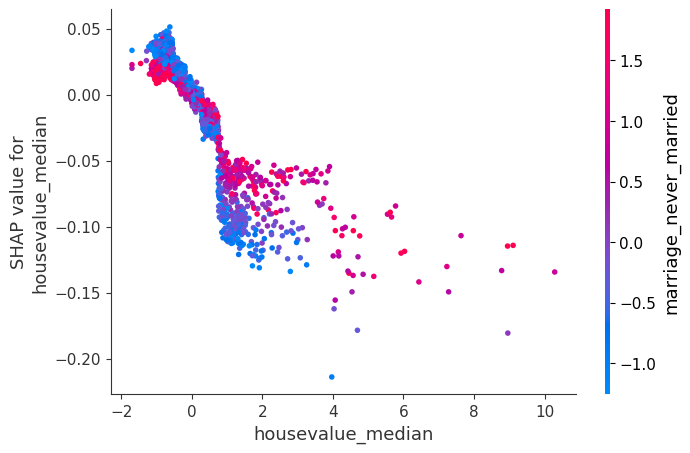

In [29]:
top_features = ["marriage_never_married", "race_white", "insured_under65", "ind_agriculture", "edu_high", "housevalue_median"]
for feature in top_features:
    ind_f = X.columns.get_loc(feature)
    shap.dependence_plot(ind=ind_f, shap_values=shap_values_2, features=x_scaled, show=False)
    plt.show()

# Wykresy wodospadowe

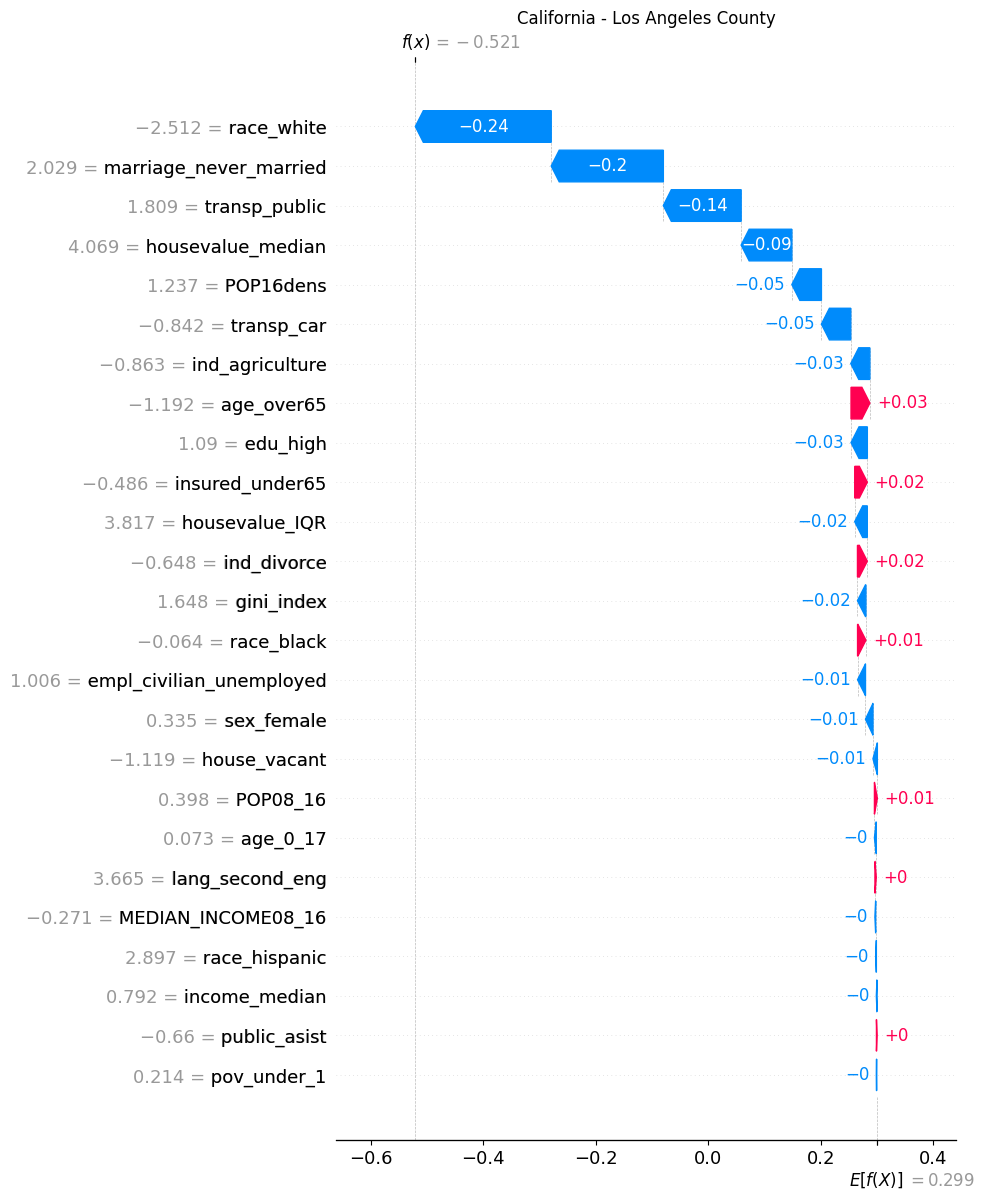

In [33]:
shap.plots.waterfall(shap_values[204], max_display=30, show=False)
plt.title("California - Los Angeles County")
plt.show()

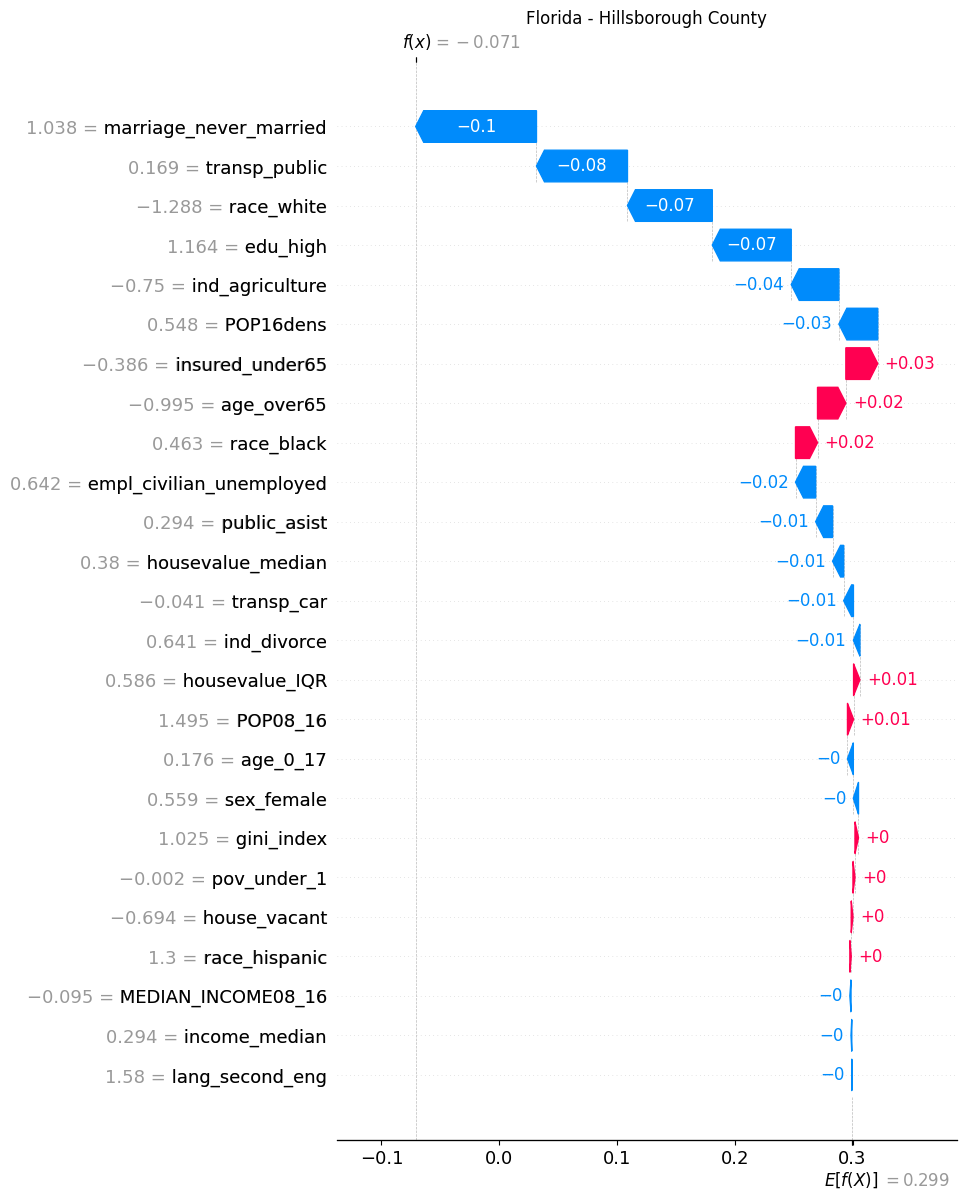

In [34]:
shap.plots.waterfall(shap_values[347], max_display=30, show=False)
plt.title("Florida - Hillsborough County")
plt.show()

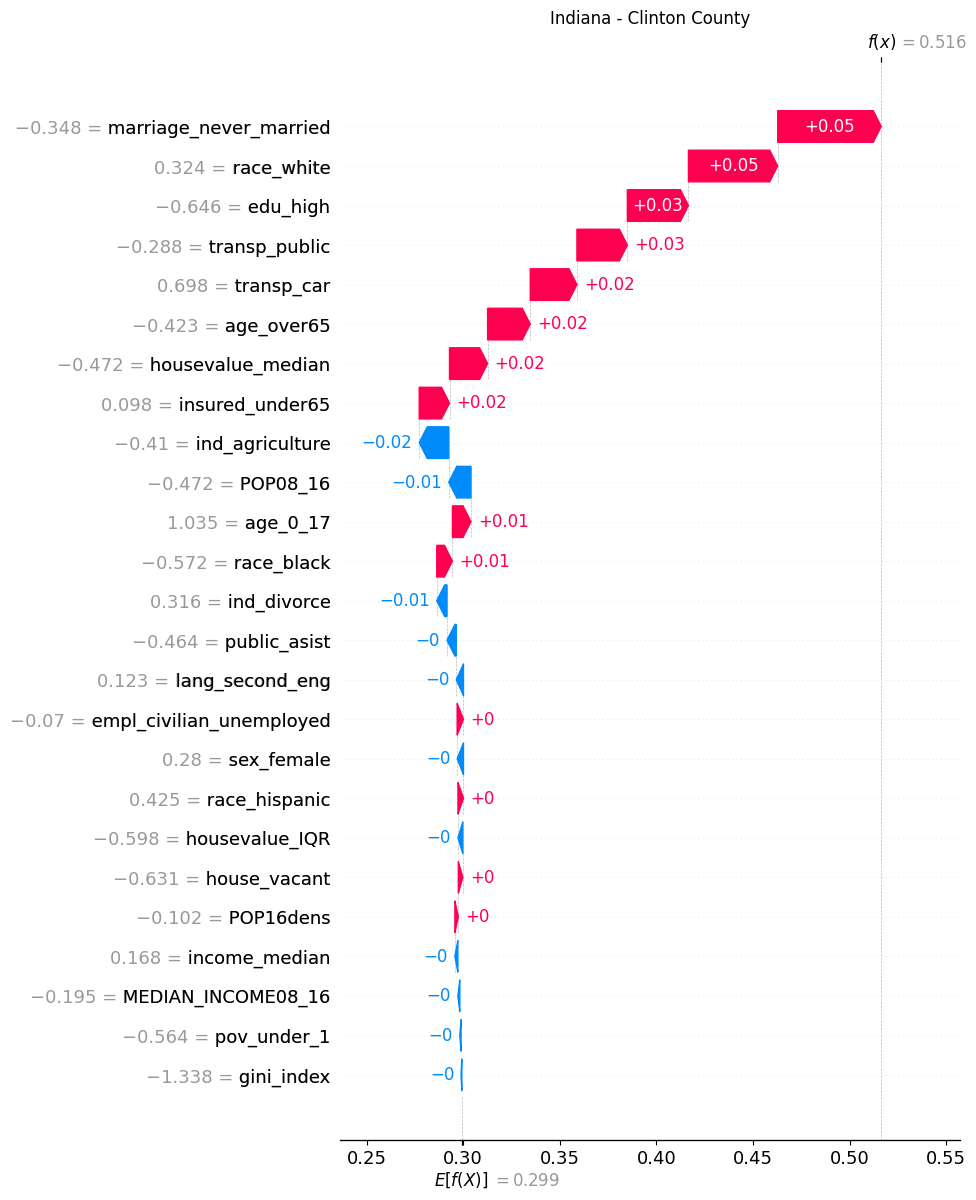

In [35]:
shap.plots.waterfall(shap_values[708], max_display=30, show=False)
plt.title("Indiana - Clinton County")
plt.show()

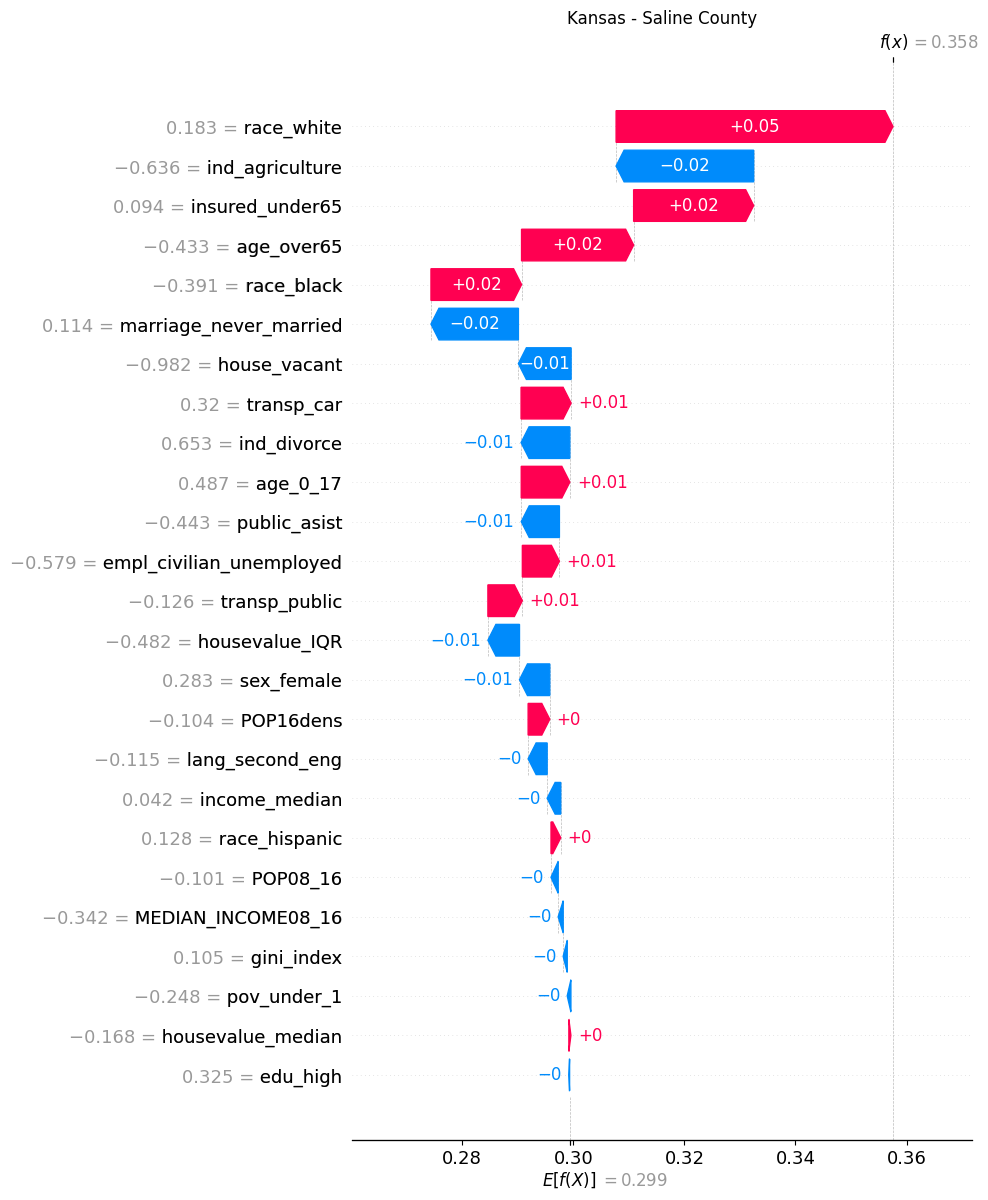

In [36]:
shap.plots.waterfall(shap_values[972], max_display=30, show=False)
plt.title("Kansas - Saline County")
plt.show()

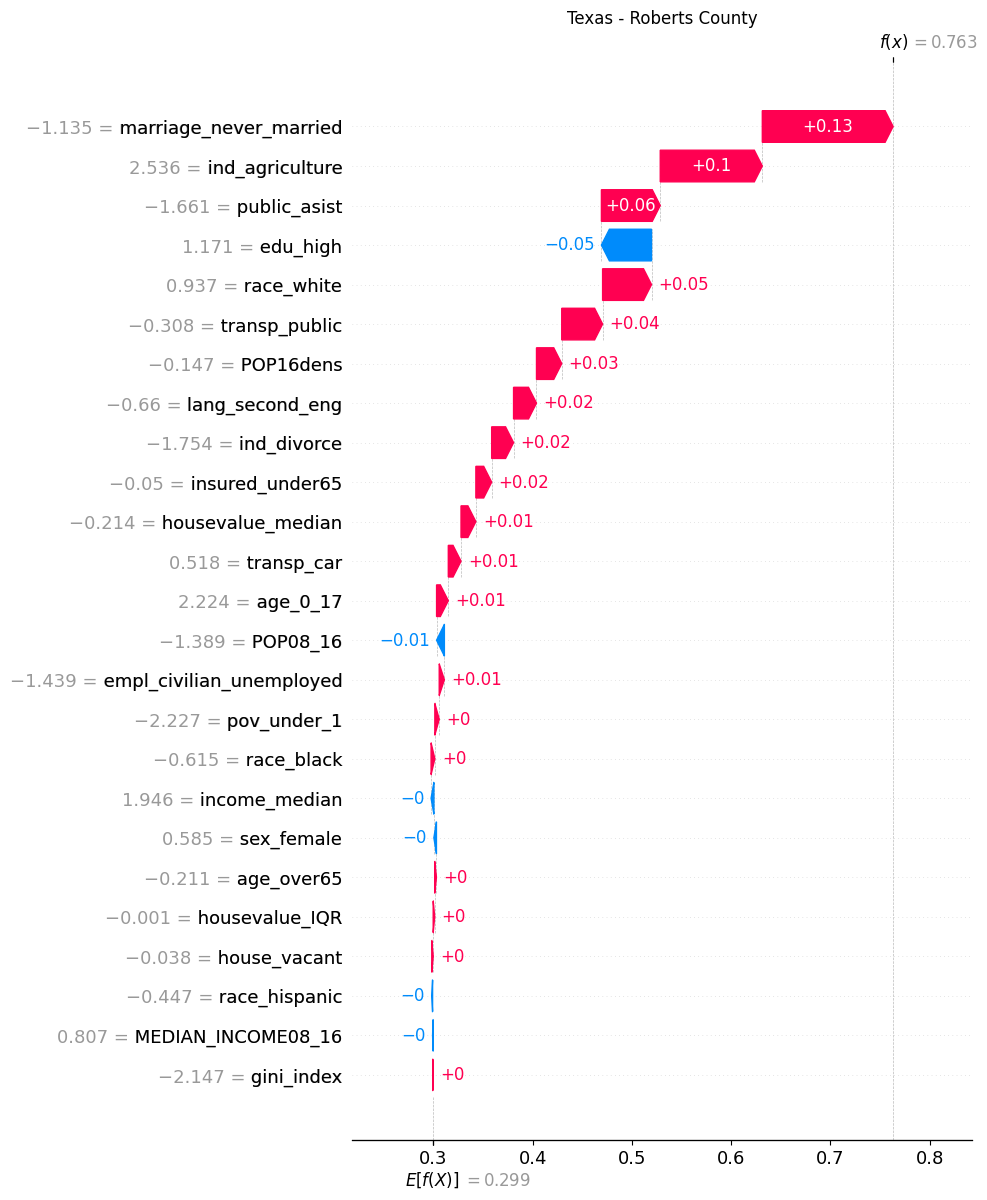

In [38]:
shap.plots.waterfall(shap_values[2719], max_display=30, show=False)
plt.title("Texas - Roberts County")
plt.show()

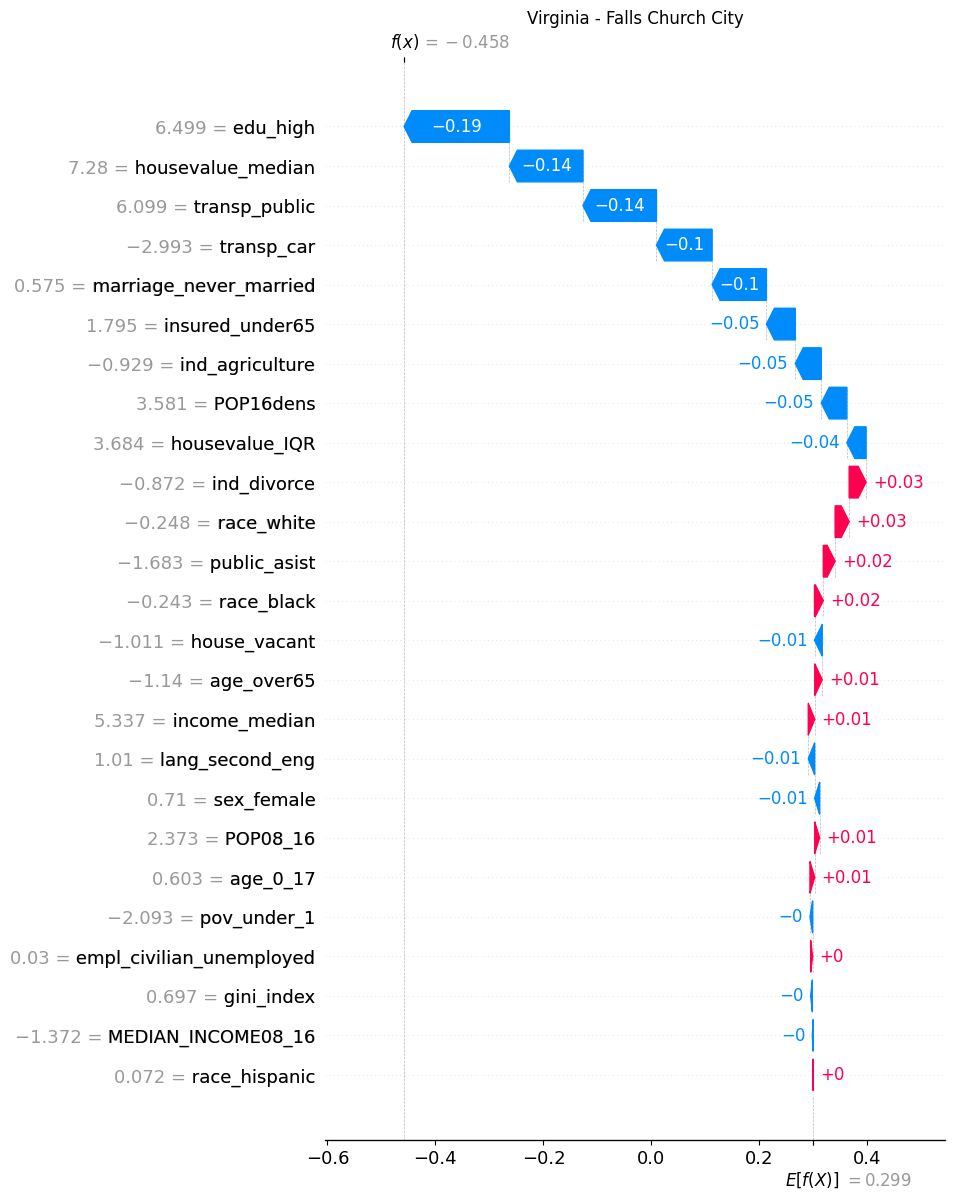

In [41]:
shap.plots.waterfall(shap_values[2925], max_display=30, show=False)
plt.title("Virginia - Falls Church City")
plt.show()

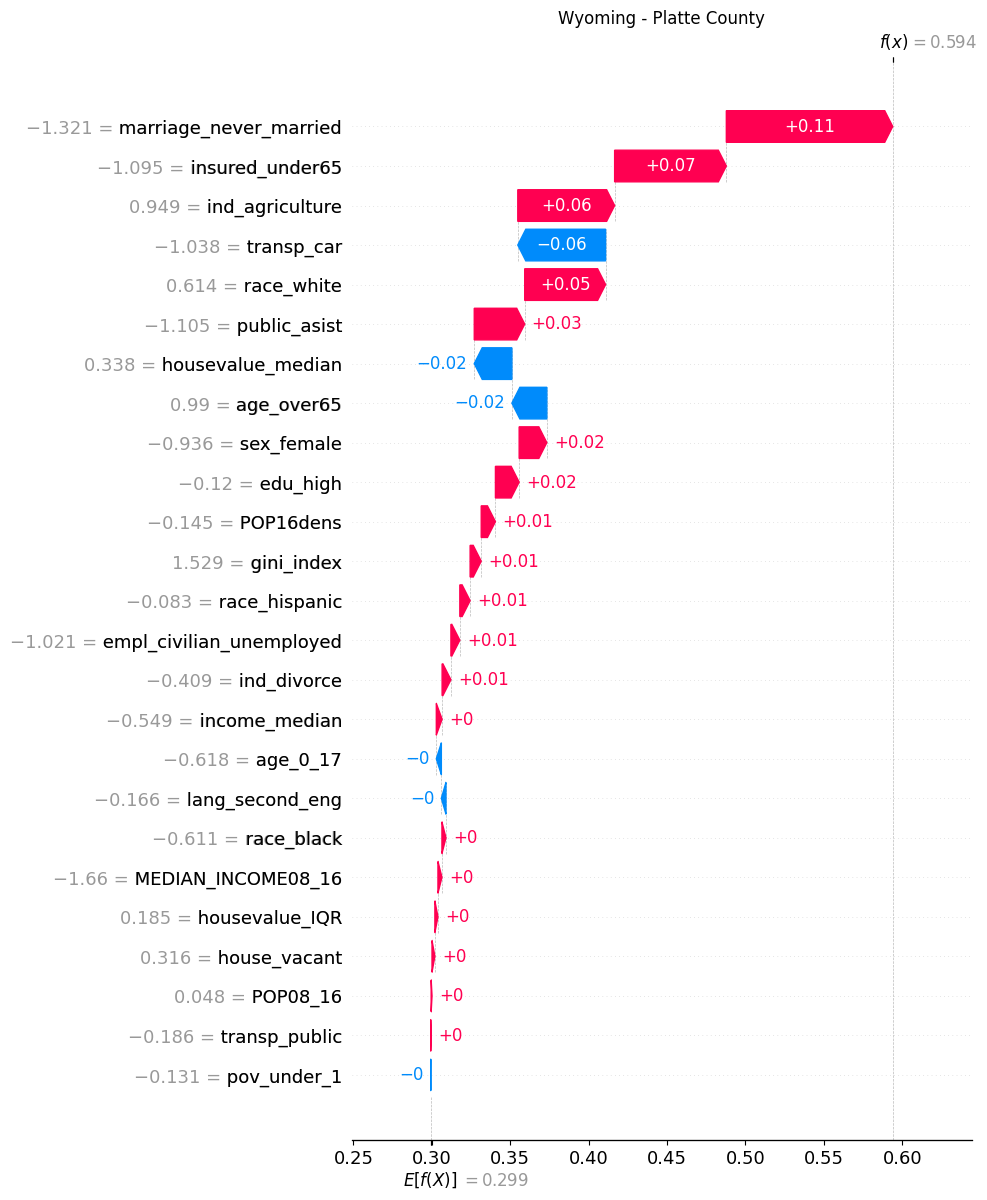

In [42]:
shap.plots.waterfall(shap_values[3134], max_display=30, show=False)
plt.title("Wyoming - Platte County")
plt.show()